## Important Note  
Before you start the development, we strongly recommend you look at the rubric in your classroom, against which the human Mentor will review your submission. Your submission must satisfy all rubric criteria to pass the project; otherwise, the Mentor may ask you to re-submit. The rubric is available on the **Project Rubric** page towards the end of the current lessons. 

By carefully following the tips provided in this notebook, you can meet all rubric criteria and successfully complete the project.  If needed, you can use **Google Translate** to translate the tips for better understanding. Once you have met all rubric requirements, be sure to:  
- Remove all instructional tips from the current notebook, including the current Tip.  
- Replace placeholder text, such as `yourname`, with your actual details.  

This will ensure your submission is polished and ready for evaluation.

**Delete this cell, once you have met all rubric requirements**.

# Part I - Ford GoBike System Exploration
#### by Ammar Yasser

## Introduction
The Ford GoBike System dataset contains bike trip data from the San Francisco Bay Area. It includes information on trip duration, start and end locations, and user type. This data can help explore bike usage patterns in the city.

## Preliminary Wrangling

In [136]:
# Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the Ford GoBike dataset to explore bike usage patterns and trip trends.

In [137]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [138]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [140]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

### Converting columns' data types

> Define the columns that need to be converted and their types


In [141]:
conversion_dict = {
    'start_time': 'datetime',
    'end_time': 'datetime',
    'start_station_id': 'int',
    'end_station_id': 'int',
    'member_birth_year': 'int',
    'user_type': 'category',
    'member_gender': 'category',
    'bike_share_for_all_trip': 'bool'
}

> Loop through the dictionary and convert each column


In [142]:
for column, dtype in conversion_dict.items():
    if dtype == 'datetime':
        df[column] = pd.to_datetime(df[column], errors='coerce')
    elif dtype == 'category':
        df[column] = df[column].astype('category')
    elif dtype == 'int64':
        df[column] = df[column].astype('int64')


In [143]:
# check the updated dataframe types
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
member_birth_year                 float64
member_gender                    category
bike_share_for_all_trip            object
dtype: object

In [144]:
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [145]:
df.shape

(183412, 16)

In [146]:
df.describe()

,duration_sec,start_time,end_time,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183412,183412,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,2019-02-15 21:07:59.090985728,2019-02-15 21:20:05.668533504,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
min,61.000000,2019-02-01 00:00:20.636000,2019-02-01 00:04:52.058000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,2019-02-08 08:31:50.814249984,2019-02-08 08:42:17.385500160,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,2019-02-15 23:05:02.337500160,2019-02-15 23:17:22.168000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,2019-02-22 11:01:16.969750016,2019-02-22 11:14:24.885750016,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,2019-02-28 23:59:18.548000,2019-03-01 08:01:55.975000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000
std,1794.389780,NaN,NaN,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689


### What is the structure of your dataset?

The dataset contains 183,412 records with 16 features including:

1. **duration_sec**: the duration of the trip in seconds

2. **start_time**: the date and time when the trip started

3. **end_time**: the date and time when the trip ended

4. **start_station_id**: The unique identifier for the station where the trip began

5. **start_station_name**: the name of the station where the trip began

6. **start_station_latitude**: The latitude coordinate of the start station

7. **start_station_longitude**: The longitude coordinate of the start station

8. **end_station_id**: the unique identifier for the station where the trip ended

9. **end_station_name**: The name of the station where the trip ended

10. **end_station_latitude**: The latitude coordinate of the end station

11. **end_station_longitude**: The longitude coordinate of the end station

12. **bike_id**: The unique identifier for the bike used during the trip

13. **user_type**: The type of user: "Subscriber" for members or "Customer" for casual users

14. **member_birth_year**: The birth year of the user

15. **member_gender**: The gender of the user

16. **bike_share_for_all_trip**: Indicates whether the trip was part of the "Bike Share for All" program which offers discounted memberships to low income residents



### What is/are the main feature(s) of interest in your dataset?

The main features of interest are the trip duration, start and end stations, user type, and start time, as they provide key insights into bike usage patterns


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Features like end time, member birth year, gender, and bike-sharing status will help support the investigation by providing context on user demographics and trip patterns



## Univariate Exploration

> In this section, investigate distributions of individual variables. If you see unusual points or outliers, take a deeper look to clean things up and prepare yourself to look at relationships between variables.

>**Rubric Requirement**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 

> **Rubric Requirement**: This part (Univariate Exploration) should include at least one histogram, and either a bar chart of count plot.

>**Rubric Requirement**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

#### Trip Duration Histogram

##### **1st Question:** How is the distribution of trip durations? Are there any unusual patterns?


Text(0.5, 1.0, 'Distribution of Trip Duration')

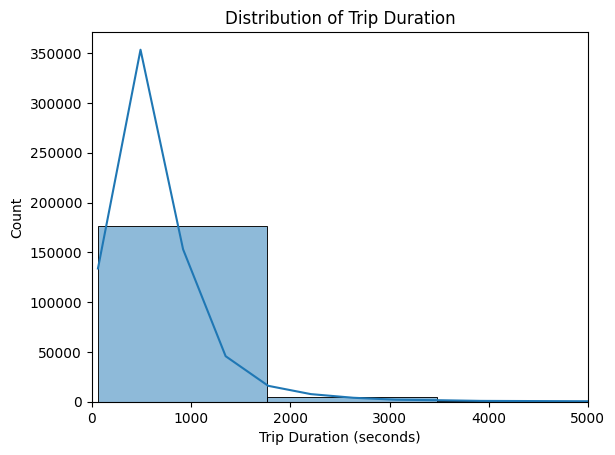

In [147]:
sns.histplot(df['duration_sec'], bins=50, kde=True)
plt.xlim(0, 5000)  # limiting to 5000 sec for better visibility
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Count')
plt.title('Distribution of Trip Duration')


- Most trips last under 1000 seconds (~16 minutes)
- There is a long tail, meaning some trips last much longer
- Some extreme outliers exceed 5000 seconds (~83 minutes)


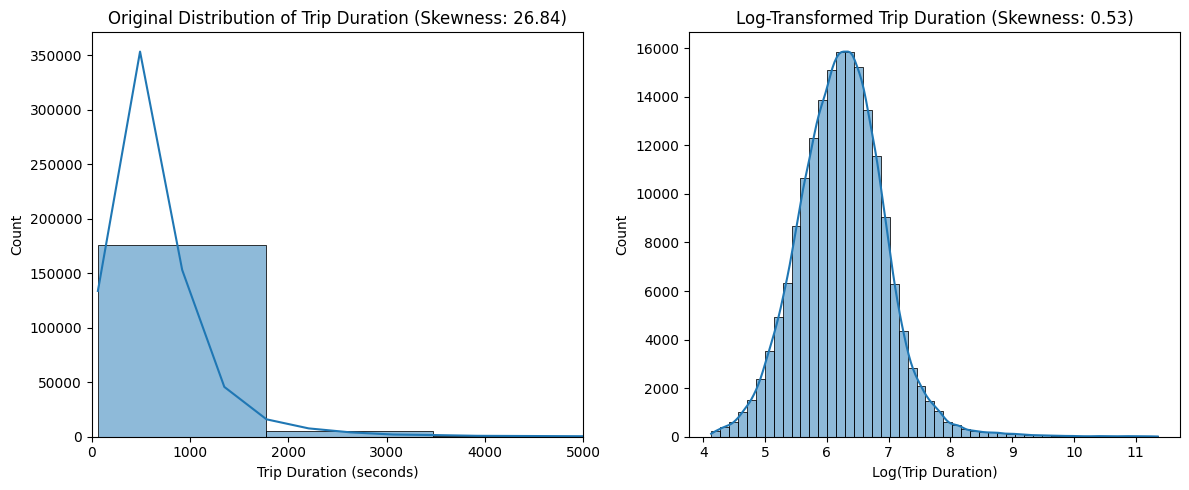

In [148]:
# Check for skewness
skewness = df['duration_sec'].skew()

# Plot original distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['duration_sec'], bins=50, kde=True)
plt.xlim(0, 5000)  # limiting to 5000 sec for better visibility
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Count')
plt.title(f'Original Distribution of Trip Duration (Skewness: {skewness:.2f})')

# If the skewness is high, apply log transformation
if skewness > 1:
    df['log_duration_sec'] = np.log1p(df['duration_sec'])  # log(1 + x) to handle zero values
    log_skewness = df['log_duration_sec'].skew()

    # Plot log-transformed distribution
    plt.subplot(1, 2, 2)
    sns.histplot(df['log_duration_sec'], bins=50, kde=True)
    plt.xlabel('Log(Trip Duration)')
    plt.ylabel('Count')
    plt.title(f'Log-Transformed Trip Duration (Skewness: {log_skewness:.2f})')

plt.tight_layout()
plt.show()


- Due to the high right skew, a log transformation was applied to normalize the distribution, making it closer to a bell-shaped curve.


---------

#### Member Birth Year Histogram

##### **2nd Question:** What is the age distribution of bike riders? Are there unusual age patterns?


Text(0.5, 1.0, 'Distribution of Rider Birth Years')

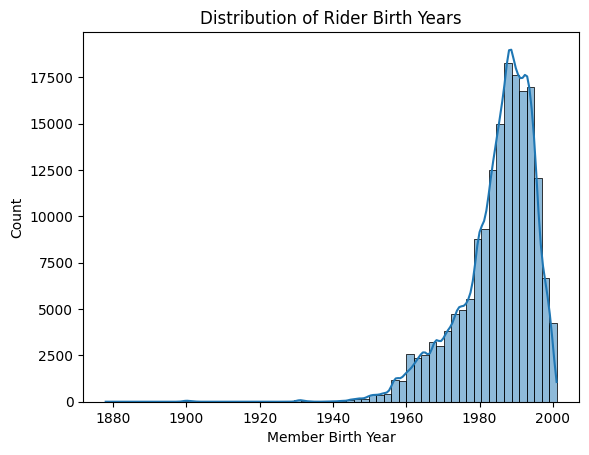

In [149]:
sns.histplot(df['member_birth_year'].dropna(), bins=60, kde=True)
plt.xlabel('Member Birth Year')
plt.ylabel('Count')
plt.title('Distribution of Rider Birth Years')

 - Most riders were born between **1980 and 2000**.
 - A few birth years are extreme (e.g., 1900 or earlier), i think it's a data entry error


-------

#### Bike Share for All Trip Distribution


##### **3rd Question:** How many users are part of the Bike Share for All program?

C:\Users\Yasser\AppData\Local\Temp\ipykernel_8968\2178827984.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['bike_share_for_all_trip'],


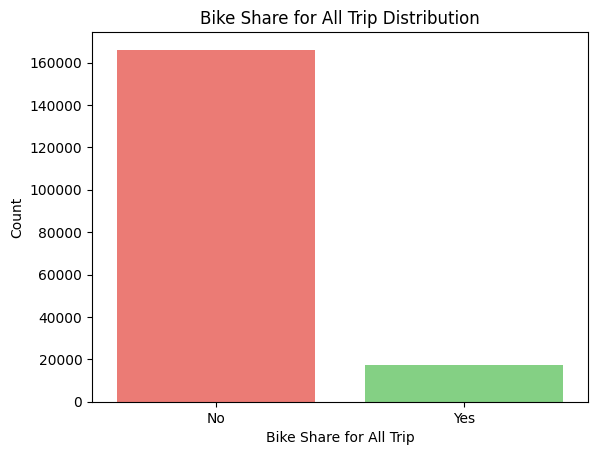

In [150]:
sns.countplot(x=df['bike_share_for_all_trip'], 
              palette=["#ff6961", "#77dd77"],  # Muted red and muted green hex codes
              order=["No", "Yes"])
plt.xlabel('Bike Share for All Trip')
plt.ylabel('Count')
plt.title('Bike Share for All Trip Distribution')
plt.show()

------

#### User Type Count Plot



##### **4th Question:** What is the proportion of Subscribers vs. Customers?

Text(0.5, 1.0, 'User Type Distribution')

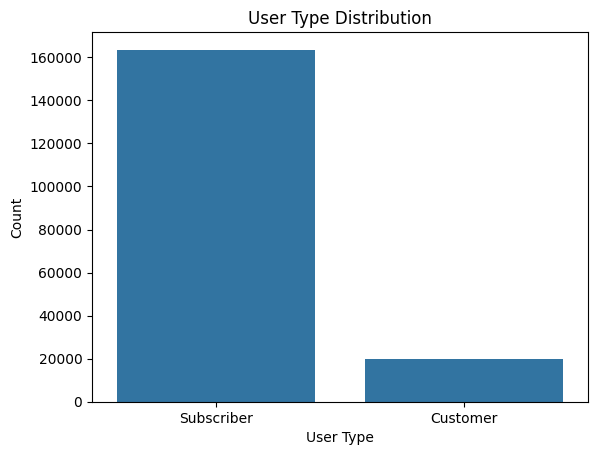

In [151]:
order1 = df['user_type'].value_counts().index
sns.countplot(x=df['user_type'], color='tab:blue',order=order1)
plt.xlabel('User Type')
plt.ylabel('Count')
plt.title('User Type Distribution')


 - Most users are **Subscribers**, meaning they use the service regularly.
 - **Customers (occasional riders)** are far fewer in comparison.

-----

#### Member Gender Bar Chart




##### **5th Question:** What is the gender distribution among bike riders?

C:\Users\Yasser\AppData\Local\Temp\ipykernel_8968\1771173177.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['member_gender'].dropna(), palette="pastel", order=order2)


Text(0.5, 1.0, 'Gender Distribution of Riders')

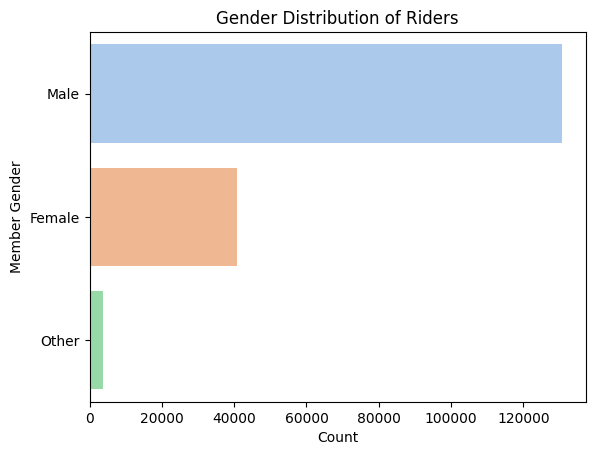

In [152]:
order2 = df['member_gender'].value_counts().index

sns.countplot(y=df['member_gender'].dropna(), palette="pastel", order=order2)
plt.ylabel('Member Gender')
plt.xlabel('Count')
plt.title('Gender Distribution of Riders')

 - Majority of riders are **Male**, followed by **Female**.
- Some users selected "Other" as their gender.


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

the trip duration distribution is highly right-skewed, with most trips lasting under 1000 seconds (~16 minutes) but some extending beyond 5000 seconds (~83 minutes). These long trips could be outliers, possibly due to unusual usage patterns or errors in trip logging. A log transformation could help visualize the data more effectively

The member birth year distribution shows that most users were born between 1980 and 2000, but there are some unrealistic values, such as birth years before 1900, which are likely data entry errors. These values may need to be removed or corrected

For categorical variables, the user type distribution is highly imbalanced, with far more subscribers than customers, indicating that most users are regular riders rather than occasional ones

The bike share for all trips feature shows that most users do not share bikes for all trips, suggesting that bike-sharing is used primarily for individual rides rather than group use

The gender distribution is also skewed, with more male riders than female riders, which might indicate a demographic trend in bike usage


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Yes some features had unusual distributions that required attention like:
Trip Duration: Since the distribution is highly skewed, a log transformation could be applied to normalize the data and make trends more apparent.

Member Birth Year: Some values were implausibly old (before 1900), likely due to data entry errors. These would need to be cleaned or removed to avoid misleading analysis

Categorical Features (User Type, Bike Share Status, Gender): These distributions were mostly expected, but the imbalance in user type (subscribers vs. customers) might require resampling in certain analyses to prevent bias.


## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your data. Make sure the variables that you cover here have been introduced in some fashion in the previous section (univariate exploration).

> **Rubric Tip**: This part (Bivariate Exploration) should include at least one scatter plot, one box plot, and at least one clustered bar chart or heat map.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> **Rubric Requirement**: Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

> **Rubric Requirement**: This part (Multivariate Exploration) should include at least one Facet Plot, and one Plot Matrix or Scatterplot with multiple encodings.

>**Rubric Requirement**: Think carefully about how you encode variables. Choose appropriate color schemes, markers, or even how Facets are chosen. Also, do not overplot or incorrectly plot ordinal data.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
> **Rubric Requirement**: You can write a summary of the main findings and reflect on the steps taken during the data exploration.

> **Rubric Requirement**: Create a list of summary findings to make it easy to review.

### Remove all **Rubric Requirement** text 
Remove all **Rubric Requirement** text mentioned above, as well the text below, before you convert this notebook to PDF/HTML.


>At the end of your report, make sure that you export the notebook as an html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep track of where the exported file goes, so you can put it in the same folder as this notebook for project submission. Also, make sure you remove all of the quote-formatted guide notes like this one before you finish your report!

